In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve, cond

**Zadanie 1.**

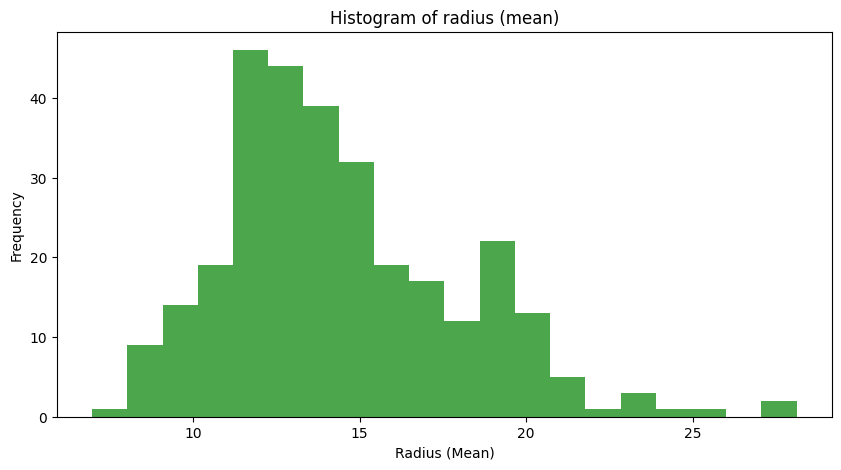

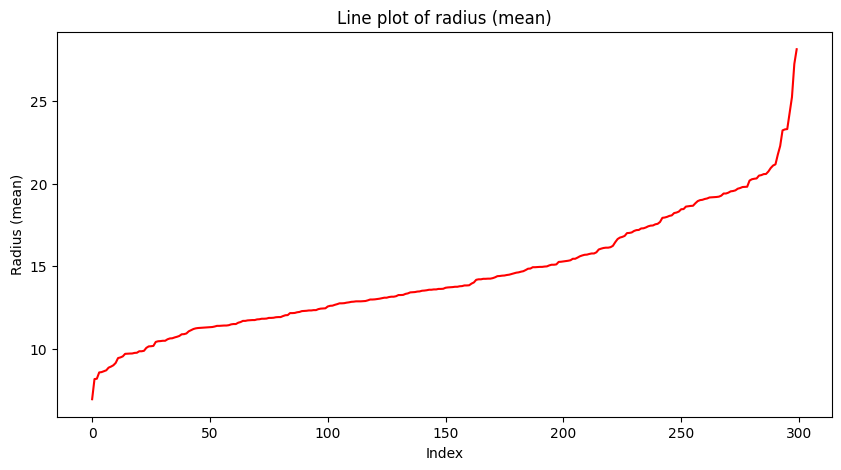

1809248222523.9924 9.056821930724577e+17
Liniowa FP: 6 FN: 2
Kwadratowa FP: 15 FN: 5


In [37]:

# Wczytanie nazw kolumn z pliku
labels_path = './breast-cancer.labels'
with open(labels_path, 'r') as file:
    column_names = file.read().splitlines()

# Wczytanie zbiorów danych
train_data_path = './breast-cancer-train.dat'
validate_data_path = './breast-cancer-validate.dat'
train_data = pd.io.parsers.read_csv(train_data_path, header=None, names=column_names)
validate_data = pd.io.parsers.read_csv(validate_data_path, header=None, names=column_names)

# Histogram i wykres liniowy dla kolumny 'radius (mean)'
plt.figure(figsize=(10, 5))
plt.hist(train_data['radius (mean)'], bins=20, color='green', alpha=0.7)
plt.title('Histogram of radius (mean)')
plt.xlabel('Radius (Mean)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_data['radius (mean)'].sort_values().reset_index(drop=True), color='red')
plt.title('Line plot of radius (mean)')
plt.xlabel('Index')
plt.ylabel('Radius (mean)')
plt.show()

# Przygotowanie danych dla metod liniowej i kwadratowej
columns_quadratic = ['radius (mean)', 'perimeter (mean)', 'area (mean)', 'symmetry (mean)']
cq = columns_quadratic

A_train_linear = np.matrix(train_data.iloc[:, 2:])
A_validate_linear = np.matrix(validate_data.iloc[:, 2:])
train_quadratic = train_data[columns_quadratic]
validate_quadratic = validate_data[columns_quadratic]

quadratic_square =  np.square(train_quadratic)
quadratic_product = pd.concat([train_quadratic[cq[0]]*train_quadratic[cq[1]], train_quadratic[cq[0]]*train_quadratic[cq[2]], 
                              train_quadratic[cq[0]]*train_quadratic[cq[3]], train_quadratic[cq[1]]*train_quadratic[cq[2]], 
                              train_quadratic[cq[1]]*train_quadratic[cq[3]], train_quadratic[cq[2]]*train_quadratic[cq[3]]], axis = 1)

A_train_quadratic = np.concatenate((train_quadratic, quadratic_square, quadratic_product), axis = 1)

validate_square =  np.square(validate_quadratic)
validate_product = pd.concat([validate_quadratic[cq[0]]*validate_quadratic[cq[1]], validate_quadratic[cq[0]]*validate_quadratic[cq[2]], 
                              validate_quadratic[cq[0]]*validate_quadratic[cq[3]], validate_quadratic[cq[1]]*validate_quadratic[cq[2]], 
                              validate_quadratic[cq[1]]*validate_quadratic[cq[3]], validate_quadratic[cq[2]]*validate_quadratic[cq[3]]], axis = 1)

A_validate_quadratic = np.concatenate((validate_quadratic, validate_square, validate_product), axis = 1)

# Stworzenie wektorów b
b_train = np.where(train_data['Malignant/Benign'] == 'M', 1, -1)
b_validate = np.where(validate_data['Malignant/Benign'] == 'M', 1, -1)

# Znalezienie wag metodą najmniejszych kwadratów
weights_linear = solve(A_train_linear.T @ A_train_linear, A_train_linear.T @ b_train[:, np.newaxis]).flat
weights_quadratic = solve(A_train_quadratic.T @ A_train_quadratic, A_train_quadratic.T @ b_train[:, np.newaxis]).flat

# Obliczenie współczynników uwarunkowania macierzy
cond_linear = cond(A_train_linear.T @ A_train_linear)
cond_quadratic = cond(A_train_quadratic.T @ A_train_quadratic)
print(cond_linear, cond_quadratic)

# Obliczenie fałszywie dodatnich oraz fałszywie ujemnych przypadków
p_linear = A_validate_linear @ weights_linear
p_quadratic = A_validate_quadratic @ weights_quadratic
predictions_linear = np.where(p_linear > 0, 1, -1)
predictions_quadratic = np.where(p_quadratic > 0, 1, -1)
fp_linear = np.sum((predictions_linear == 1) & (b_validate == -1))
fn_linear = np.sum((predictions_linear == -1) & (b_validate == 1))
fp_quadratic = np.sum((predictions_quadratic == 1) & (b_validate == -1))
fn_quadratic = np.sum((predictions_quadratic == -1) & (b_validate == 1))

# Wyniki
print("Liniowa FP:", fp_linear, "FN:", fn_linear)
print("Kwadratowa FP:", fp_quadratic, "FN:", fn_quadratic)
